1. Explorar las primeras filas del archivo y mostrar la estructura original


In [18]:
import pandas as pd
emisiones = pd.read_csv("Emisiones_CO2.csv", encoding='latin1', sep='|')

#print("Impresion de las primeras 5 registros")
#print(emisiones.head())
print("\nImpresion de los primeros 10 registros")
emisiones.head(10)


Impresion de los primeros 10 registros


,Código de país,Nombre del país,Región,Año,CO2 (kt),CO2 per cápita (toneladas métricas)
0,ABW,Aruba,América Latina y Caribe,1960,NaN,NaN
1,ABW,Aruba,América Latina y Caribe,1961,NaN,NaN
2,ABW,Aruba,América Latina y Caribe,1962,NaN,NaN
3,ABW,Aruba,América Latina y Caribe,1963,NaN,NaN
4,ABW,Aruba,América Latina y Caribe,1964,NaN,NaN
5,ABW,Aruba,América Latina y Caribe,1965,NaN,NaN
6,ABW,Aruba,América Latina y Caribe,1966,NaN,NaN
7,ABW,Aruba,América Latina y Caribe,1967,NaN,NaN
8,ABW,Aruba,América Latina y Caribe,1968,NaN,NaN
9,ABW,Aruba,América Latina y Caribe,1969,NaN,NaN


2. Verificar el número de filas y de columnas del archivo

In [2]:
emisiones.shape

(11127, 6)

3. Identificar los tipos de datos de cada columna

In [3]:
#emisiones.dtypes
emisiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Código de país                       11127 non-null  object
 1   Nombre del país                      11127 non-null  object
 2   Región                               11127 non-null  object
 3   Año                                  11127 non-null  int64 
 4   CO2 (kt)                             9032 non-null   object
 5   CO2 per cápita (toneladas métricas)  9029 non-null   object
dtypes: int64(1), object(5)
memory usage: 521.7+ KB


4. Contar la cantidad de valores nulos en cada columna

In [4]:
emisiones.isnull().sum()

Código de país                            0
Nombre del país                           0
Región                                    0
Año                                       0
CO2 (kt)                               2095
CO2 per cápita (toneladas métricas)    2098
dtype: int64

5. Comprobar si exiten filas ducplicadas y eliminalas si las hubiera

In [5]:
emisiones.duplicated().sum()

np.int64(0)

6. Convertir las columnas de tipo fecha o numerico al formato correspondiente

In [6]:
emisiones["CO2 (kt)"]=pd.to_numeric(emisiones["CO2 (kt)"], errors='coerce')
emisiones["CO2 per cápita (toneladas métricas)"]=pd.to_numeric(emisiones["CO2 per cápita (toneladas métricas)"], errors='coerce')
emisiones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Código de país                       11127 non-null  object 
 1   Nombre del país                      11127 non-null  object 
 2   Región                               11127 non-null  object 
 3   Año                                  11127 non-null  int64  
 4   CO2 (kt)                             2 non-null      float64
 5   CO2 per cápita (toneladas métricas)  0 non-null      float64
dtypes: float64(2), int64(1), object(3)
memory usage: 521.7+ KB


7. Calcular la media, minimo y maximo de las columnas numericas

In [7]:
#emisiones.describe()
emisiones["CO2 (kt)"].mean()
print(f"La media de emisiones de CO2 es: {emisiones['CO2 (kt)'].mean():.2f} kt")
emisiones["CO2 (kt)"].min()
print(f"La minima de emisiones de CO2 es: {emisiones['CO2 (kt)'].min():.2f} kt")
emisiones["CO2 (kt)"].max() 
print(f"La maxima de emisiones de CO2 es: {emisiones['CO2 (kt)'].max():.2f} kt")    

La media de emisiones de CO2 es: 163.18 kt
La minima de emisiones de CO2 es: 7.33 kt
La maxima de emisiones de CO2 es: 319.03 kt


8. Ordenar los registros segun una columna relevante en orden descendnte

In [8]:
emisiones.sort_values(by="CO2 (kt)", ascending=False).head(10)

,Código de país,Nombre del país,Región,Año,CO2 (kt),CO2 per cápita (toneladas métricas)
8054,POL,Polonia,Europa y Asia Central,2006,319.029,NaN
2488,CYP,Chipre,Europa y Asia Central,2004,7.334,NaN
0,ABW,Aruba,América Latina y Caribe,1960,NaN,NaN
1,ABW,Aruba,América Latina y Caribe,1961,NaN,NaN
2,ABW,Aruba,América Latina y Caribe,1962,NaN,NaN
3,ABW,Aruba,América Latina y Caribe,1963,NaN,NaN
4,ABW,Aruba,América Latina y Caribe,1964,NaN,NaN
5,ABW,Aruba,América Latina y Caribe,1965,NaN,NaN
6,ABW,Aruba,América Latina y Caribe,1966,NaN,NaN
7,ABW,Aruba,América Latina y Caribe,1967,NaN,NaN


9. Corrige los separadores decimales, estandariza los nombres de columnas a minúsculas, sin espacios ni tildes y resuelve nulos

In [19]:
import unicodedata as ud

## Estandarizar los nombres de columnas PRIMERO (minúscula, sin espacios, sin tildes)
emisiones.columns = ( emisiones.columns
                            .str.lower() # convertir a minúscula
                            .str.replace(" ","_", regex=False) # resolvemos espacios entre las palabras
                            .map(lambda x: ud.normalize("NFKD",x) # descomponemos los elementos de cada letra 
                                 .encode("ascii","ignore") # ignorando los elementos que no corresponden a UTF-8
                                 .decode("latin1") # convertimos a un tipo de codificación
                                 )
)

## Corregir separadores decimales (ahora con nombres ya estandarizados)
ruta = r"Emisiones_CO2.csv" # Encapsulamos la ruta
cols_afectadas = ["co2_(kt)","co2_per_capita_(toneladas_metricas)"] # nombres ya estandarizados
df_afectado = pd.read_csv(ruta, encoding="latin1", sep="|", usecols=["CO2 (kt)","CO2 per cápita (toneladas métricas)"], dtype=str)

df_afectado = (df_afectado
               .apply(lambda x: x.str.replace(".","", regex=False)) # reemplazamos "." por nada
               .apply(lambda x: x.str.replace(",",".", regex=False)) # reemplazamos "," por "."
               .apply(pd.to_numeric, errors="coerce") # convertimos a número
)

emisiones[cols_afectadas] = df_afectado.astype("float64") # guardamos la corrección

## Resolver nulos
emisiones = emisiones.dropna()

In [20]:
emisiones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9029 entries, 26 to 11126
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   codigo_de_pais                       9029 non-null   object 
 1   nombre_del_pais                      9029 non-null   object 
 2   region                               9029 non-null   object 
 3   ano                                  9029 non-null   int64  
 4   co2_(kt)                             9029 non-null   float64
 5   co2_per_capita_(toneladas_metricas)  9029 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 493.8+ KB


10. Calcula media, mediana, desviación estándar, max y min por país

In [21]:
emisiones.groupby("nombre_del_pais")["co2_(kt)"].agg(["mean","median","std","max","min"]).round(0).sort_values("median",ascending=False)

#pd.reset_option('display.max_rows')

,mean,median,std,max,min
nombre_del_pais,,,,,
Estados Unidos,4700041.0,4796289.0,805257.0,5795162.0,2880506.0
China,2639401.0,2017761.0,2215506.0,9019518.0,433234.0
Rusia,1660534.0,1615746.0,144980.0,2081840.0,1498344.0
Japón,927873.0,943851.0,297586.0,1259328.0,232781.0
Alemania,827601.0,828771.0,54365.0,929973.0,721064.0
...,...,...,...,...,...
Comoras,59.0,53.0,37.0,158.0,11.0
Dominica,58.0,48.0,40.0,150.0,11.0
Santo Tomé y Príncipe,43.0,48.0,26.0,103.0,7.0


11. Calcula Q1, Q2 y Q3 de emisiones por region e identifica qué países están por encima del percentil 90

In [22]:
# Cálculo de cuartiles Q1, Q2 y Q3
#emisiones["co2_(kt)"].quantile([0.25,0.5,0.75])

# Cálculo de percentil 90
p90 = emisiones["co2_(kt)"].quantile(0.9)

emisiones[emisiones["co2_(kt)"] > p90]

,codigo_de_pais,nombre_del_pais,region,ano,co2_(kt),co2_per_capita_(toneladas_metricas)
311,ARE,Emiratos Árabes Unidos,Oriente Medio y Norte de África,2011,178483.89,20.433838
358,ARG,Argentina,América Latina y Caribe,2006,174237.51,4.404525
359,ARG,Argentina,América Latina y Caribe,2007,179738.01,4.496834
360,ARG,Argentina,América Latina y Caribe,2008,191578.75,4.744178
361,ARG,Argentina,América Latina y Caribe,2009,180654.76,4.427960
...,...,...,...,...,...,...
10966,ZAF,Sudáfrica,África subsahariana,2007,440989.75,9.063326
10967,ZAF,Sudáfrica,África subsahariana,2008,469089.97,9.506481
10968,ZAF,Sudáfrica,África subsahariana,2009,477806.43,9.545495
10969,ZAF,Sudáfrica,África subsahariana,2010,454950.02,8.957154


12. Graficar la evolucion anual del CO2 (linea) de un pais elegido. Agregar titulo, ejes y marcadores

In [23]:
emisiones.to_csv("Emisiones_CO2_cleaned.csv", encoding='latin1', sep='|', index=False)

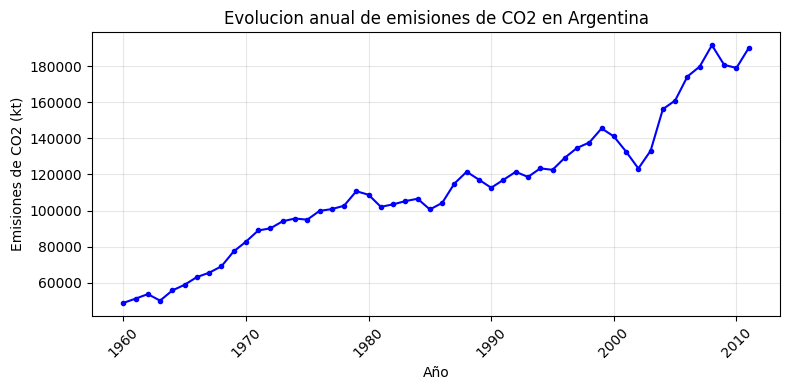

<Figure size 640x480 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
pais = "Argentina"

#1. Configurar la informacion
df_emisiones_CO2 = emisiones[emisiones["nombre_del_pais"] == pais].sort_values(by="ano") 
#print(df_emisiones_CO2)
x = df_emisiones_CO2["ano"]
y = df_emisiones_CO2["co2_(kt)"]

#2. Crear el lienzo
plt.figure(figsize=(8, 4)) #el tamaño esta en pulgadas (ancho, alto), recomienda usar 8x4 

#3. Graficar
plt.plot(x,y,color='blue', marker='.', linestyle='-') #configuramos color, marcador y estilo de linea hay muchos mas

#4. configurar titulos y ejes
plt.title("Evolucion anual de emisiones de CO2 en Argentina")
plt.xlabel("Año")
plt.ylabel("Emisiones de CO2 (kt)")
plt.xticks(rotation=45) #configuramos la rotacion 45° de cada elemento del eje x

#5. configuraciones varias
plt.grid(True, alpha=0.3) #mostrar la grilla
plt.tight_layout() #acomodar los margenes para que no se corte el texto

#6. Mostrar la grafica y o guardar
plt.show()
plt.savefig("emisiones_CO2_Argentina.png", dpi=300)

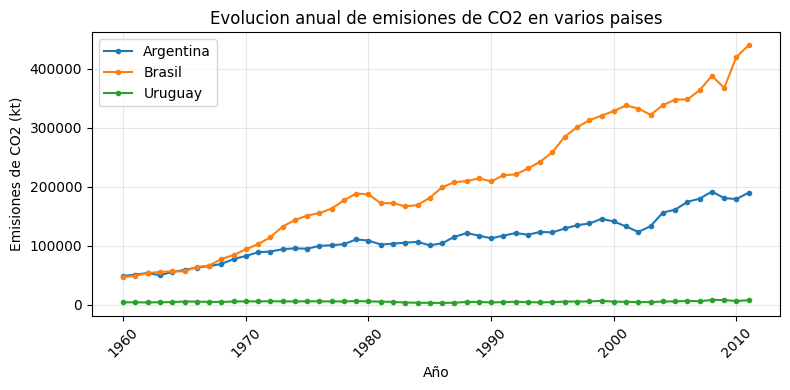

In [25]:
#SE DESEA MOSTRAR VARIOS PAISES COMO SERIES EN LA MISMA GRAFICA

import matplotlib.pyplot as plt
paises = ["Argentina", "Brasil", "Uruguay"] #cambiamos de un pais a varios

#1. Crear el lienzo
plt.figure(figsize=(8, 4)) #el tamaño esta en pulgadas (ancho, alto), recomienda usar 8x4 

#2. Configurar la informacion
for p in paises:
     df_emisiones_CO2 = emisiones[emisiones["nombre_del_pais"] == p].sort_values(by="ano") 
     x = df_emisiones_CO2["ano"]
     y = df_emisiones_CO2["co2_(kt)"]
     
     #3. Graficar cada pais
     plt.plot(x,y, marker='.', linestyle='-', label=p) #configuramos marcador y estilo de linea hay muchos mas


#4. configurar titulos y ejes
plt.title("Evolucion anual de emisiones de CO2 en varios paises")
plt.xlabel("Año")
plt.ylabel("Emisiones de CO2 (kt)")
plt.xticks(rotation=45) #configuramos la rotacion 45° de cada elemento del eje x

#5. configuraciones varias
plt.grid(True, alpha=0.3) #mostrar la grilla
plt.tight_layout() #acomodar los margenes para que no se corte el texto
plt.legend() #mostrar la leyenda con el titulo Paises

#6. Mostrar la grafica y o guardar
plt.show()
#plt.savefig("emisiones_CO2_varios_paises.png", dpi=300)

13. Calcular el promedio de C=2 por pais y muestra el top 10 en barras descendentes

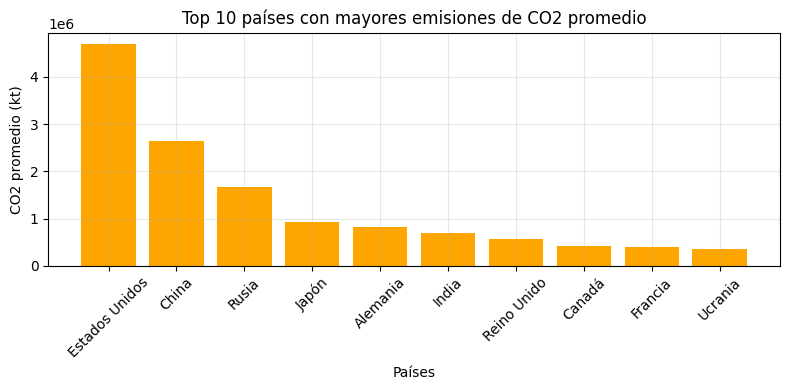

In [26]:
#1. Configurar la informacion
df_emisiones_CO2 = (emisiones
                    .groupby(["nombre_del_pais"])["co2_(kt)"].mean()
                    .sort_values(ascending=False)
                    .head(10)
)
#print(df_emisiones_CO2)

#2. Crear el lienzo
plt.figure(figsize=(8, 4)) #el tamaño esta en pulgadas (ancho, alto), recomienda usar 8x4

#3. Graficar
plt.bar(df_emisiones_CO2.index,df_emisiones_CO2.values,color='orange') #configuramos color de las barras

#4. configurar titulos y ejes
plt.title("Top 10 países con mayores emisiones de CO2 promedio")
plt.xlabel("Países")
plt.ylabel("CO2 promedio (kt)")
plt.xticks(rotation=45) #configuramos la rotacion 45° de cada elemento del eje x

#5. configuraciones varias
plt.grid(True, alpha=0.3) #mostrar la grilla solo en el eje y
plt.tight_layout() #acomodar los margenes para que no se corte el texto

#6. Mostrar la grafica y o guardar
plt.show()
#plt.savefig("top10_paises_emisiones_CO2.png", dpi=300)

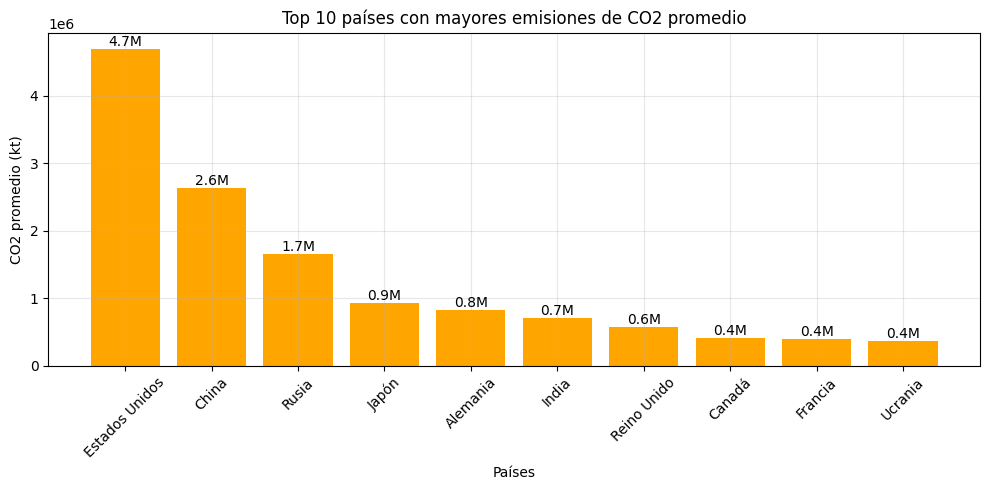

In [27]:
#1. Configurar la informacion
df_emisiones_CO2 = (emisiones
                    .groupby(["nombre_del_pais"])["co2_(kt)"].mean()
                    .sort_values(ascending=False)
                    .head(10)
)
#print(df_emisiones_CO2)

#2. Crear el lienzo
plt.figure(figsize=(10, 5)) #el tamaño esta en pulgadas (ancho, alto), recomienda usar 8x4

#3. Graficar
plt.bar(df_emisiones_CO2.index,df_emisiones_CO2.values,color='orange') #configuramos color de las barras

#4. configurar titulos y ejes
for indice,valores in enumerate (df_emisiones_CO2.values):
    millones = valores / 1_000_000
    plt.text(indice, valores + 50, f"{millones:.1f}M", ha='center', va='bottom')  # Agrega el valor encima de cada barra
plt.title("Top 10 países con mayores emisiones de CO2 promedio")
plt.xlabel("Países")
plt.ylabel("CO2 promedio (kt)")
plt.xticks(rotation=45) #configuramos la rotacion 45° de cada elemento del eje x

#5. configuraciones varias
plt.grid(True, alpha=0.3) #mostrar la grilla solo en el eje y
plt.tight_layout() #acomodar los margenes para que no se corte el texto

#6. Mostrar la grafica y o guardar
plt.show()
#plt.savefig("top10_paises_emisiones_CO2.png", dpi=300)

14. Calcula la correlacion entre columnas numericas y muestrala con un heatmap anotado

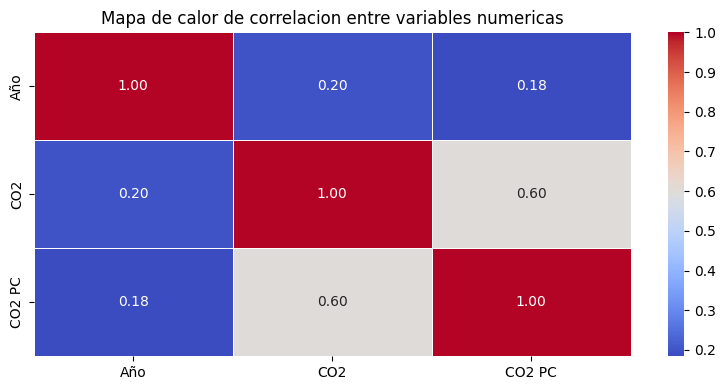

In [28]:
import seaborn as sns
#1. Configurar la informacion
correlacion = emisiones.corr(numeric_only=True, method="spearman")
nombres = {
    "ano": "Año",
    "co2_(kt)": "CO2",
    "co2_per_capita_(toneladas_metricas)": "CO2 PC"
}
correlacion = correlacion.rename(columns=nombres, index=nombres)

#2. Crear el lienzo
plt.figure(figsize=(8, 4)) #el tamaño esta en pulgadas (ancho, alto), recomienda usar 8x4

#3. Graficar
sns.heatmap(correlacion, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f",
            linewidths=0.5,
)

#4. configurar titulos y ejes
plt.title("Mapa de calor de correlacion entre variables numericas")

#5. configuraciones varias
plt.tight_layout() #acomodar los margenes para que no se corte el texto

#6. Mostrar la grafica y o guardar
plt.show()